In [1]:
import os
import random
from eval.eval import *
def get_random_files(dir1, dir2):
    """
    Randomly selects one file from each of two directories.
    
    Args:
        dir1 (str): Path to the first directory.
        dir2 (str): Path to the second directory.

    Returns:
        tuple: Paths to one randomly selected file from each directory.
    """
    # Get list of files from each directory
    files1 = [f for f in os.listdir(dir1) if os.path.isfile(os.path.join(dir1, f))]
    files2 = [f for f in os.listdir(dir2) if os.path.isfile(os.path.join(dir2, f))]

    # Ensure directories are not empty
    if not files1 or not files2:
        raise ValueError("One or both directories are empty.")

    # Randomly select one file from each directory
    file1 = random.choice(files1)
    file2 = random.choice(files2)

    return os.path.join(dir1, file1), os.path.join(dir2, file2)

# Example usage:
# dir1 = "/path/to/directory1"
# dir2 = "/path/to/directory2"
# file1, file2 = get_random_files(dir1, dir2)
# print(f"Selected files: {file1}, {file2}")


In [ ]:
dir1="loras/personal-lora-fluxdev-florence2/sample"
dir2="loras/personal-lora-fluxdev-florence2-1024/sample"
previous = []
scores = []
justifications = []
for i in range(0,80):
    imagepath1,imagepath2 = get_random_files(dir1,dir2)
    if imagepath1+imagepath2 in previous:
        continue
    previous.append(imagepath1+imagepath2)
    b64_img1 = encode_and_prepare_image(imagepath1)
    b64_img2 = encode_and_prepare_image(imagepath2)
    eval_result = eval_image_quality_tournament(b64_img1,b64_img2)
    scores.append(eval_result.score)
    justifications.append(eval_result.textual_justification)




<Axes: >

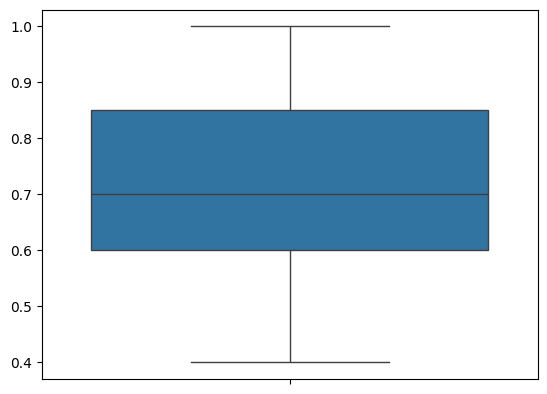

In [7]:
import seaborn as sns
sns.boxplot(scores)

In [8]:
justifications

['The first image has good fidelity and resolution, but the lighting is somewhat flat. The second image appears to have higher contrast and sharper focus, making it visually more appealing and dynamic. It also has deeper colors and better-defined features. Thus, I slightly prefer the second image in terms of quality.',
 'Both images present quality in different aspects. The first image is an illustration, showcasing high fidelity in terms of artistic style and vivid contrast with a sharp representation of the character and background. The second image is a photograph which demonstrates high resolution and realistic image quality with balanced lighting and good detail in the outdoor setting. Each image excels in its respective category, making it difficult to prefer one over the other in terms of overall quality, resolution, and contrast.',
 "The second image exhibits a higher overall quality. Its resolution appears sharper, maintaining details in both the subject's facial features and 